In [ ]:
#Analytics Assignment 2 
# Marmik Parashar
# PNR No. 240810125002

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.utils import resample

In [ ]:
# Ques1  
'''' Wine Quality Dataset
1. Calculate the five-number summary of the content.
2. Compare the five-number summary across different quality ratings.
3. Identify the wine quality with the highest median.
4. Calculate the five-number summary for white wines vs. red wines.
5. Analyze the five-number summary and identify outliers.
'''


In [37]:
# Load Wine Quality DataSet
path = "C:/Users/marmi/OneDrive/Documents/Datasets[1]/Datasets/winequalityN.csv"
wine_df = pd.read_csv(path)

# Showing the First few Rows of Dataset
wine_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
min            3.8              0.08         0.00             0.6      0.009   
25%            6.4              0.23         0.25             1.8      0.038   
50%            7.0              0.29         0.31             3.0      0.047   
75%            7.7              0.40         0.39             8.1      0.065   
max           15.9              1.58         1.66            65.8      0.611   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
min                  1.0                   6.0  0.98711  2.72       0.22   
25%                 17.0                  77.0  0.99234  3.11       0.43   
50%                 29.0                 118.0  0.99489  3.21       0.51   
75%                 41.0                 156.0  0.99699  3.32       0.60   
max                289.0                 440.0  1.03898  4.01       2.00   

     alcohol  quality  
min      8.0      3.0  
25%      9.5  

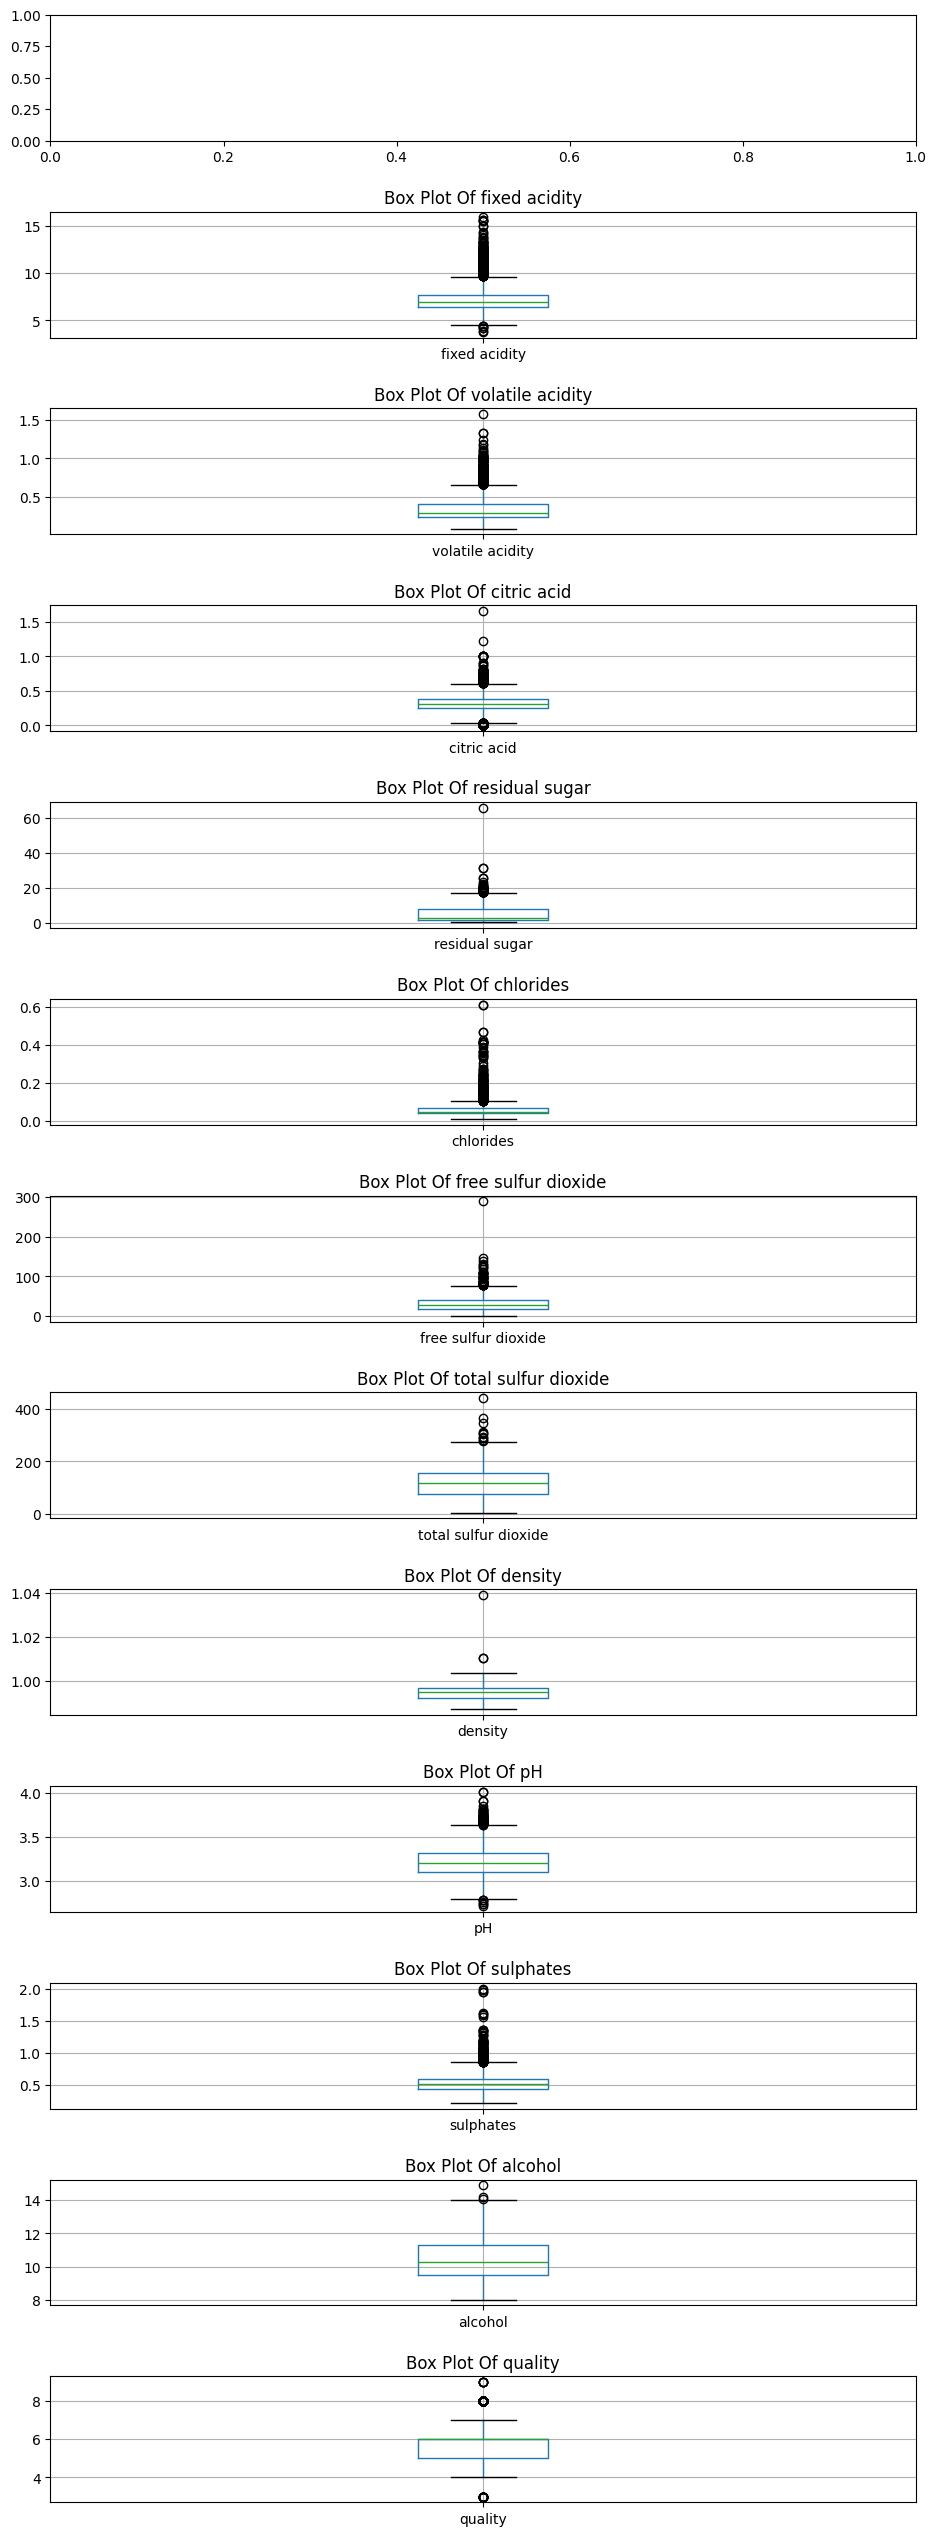

In [67]:
# Select the numerical Colums to Calculate five-number summary
# 1. Calculate the five-number summary of the content.
 
num_colums = wine_df.columns.tolist()

# Calculate five-number Summary
five_number_summary = wine_df[num_colums].describe(percentiles=[0.25, 0.5, 0.75]).loc[['min', '25%', '50%', '75%', 'max']]
print(five_number_summary)

# Box Plot 
features = wine_df.columns
num_features = len(features)
fig, axes = plt.subplots(nrows = num_features,ncols= 1,figsize = (10,num_features*2))
fig.tight_layout(pad = 3.0)

for i , feature in enumerate(features):
    if wine_df[feature].dtype != 'object':
        wine_df.boxplot(column = feature , ax = axes[i])
        axes[i].set_title(f'Box Plot Of {feature}')
plt.show()

Five Number Summary Across Different Quality Rating : 
           count       mean       std   min     25%    50%   75%   max
quality                                                              
3          30.0  10.215000  1.106497   8.0   9.625  10.15  11.0  12.6
4         216.0  10.180093  0.985923   8.4   9.400  10.00  10.9  13.5
5        2138.0   9.837783  0.814416   8.0   9.300   9.60  10.3  14.9
6        2836.0  10.587553  1.126491   8.4   9.600  10.50  11.4  14.0
7        1079.0  11.386006  1.199337   8.6  10.625  11.40  12.3  14.2
8         193.0  11.678756  1.278921   8.5  11.000  12.00  12.6  14.0
9           5.0  12.180000  1.013410  10.4  12.400  12.50  12.7  12.9


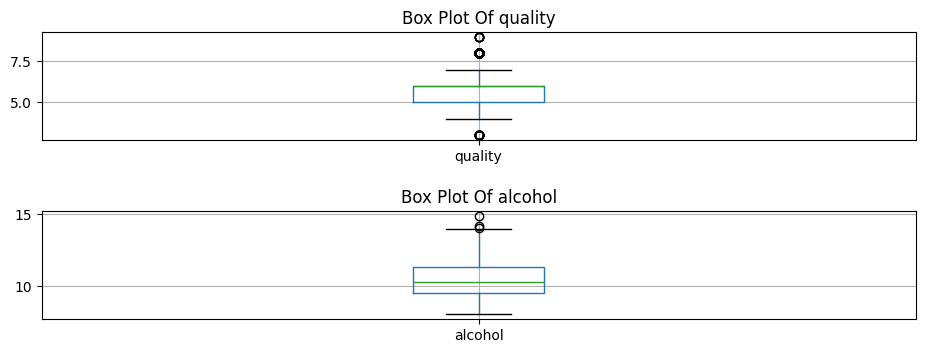

In [69]:
# 2. Compare the five-number summary across different quality ratings.

# Selecting colums for five number summary

wine_quality = wine_df.groupby('quality')['alcohol'].describe(percentiles=(.25,.5,.75))
print('Five Number Summary Across Different Quality Rating : \n' , wine_quality)

# Box Plot for Summary Across Different Quality Rating

features = ['quality' , 'alcohol']
num_features = len(features)
fig, axes = plt.subplots(nrows = num_features,ncols= 1,figsize = (10,num_features*2))
fig.tight_layout(pad = 3.0)

for i , feature in enumerate(features):
    if wine_df[feature].dtype != 'object':
        wine_df.boxplot(column = feature , ax = axes[i])
        axes[i].set_title(f'Box Plot Of {feature}')
plt.show()


In [23]:
# 3. Identify the wine quality with the highest median.

# Calculate the median quality for each wine type
wine_quality = wine_df.groupby('quality').median()

# Determine which wine type has the highest median quality
highest_type = wine_quality.idxmax()
highest_value = wine_quality.max()

# Display the results
print(f"\nThe wine type with the highest median quality is :\n {highest_type}")
print(f"\nMedian quality value :\n {highest_value}")


The wine type with the highest median quality is :
 fixed acidity           7
volatile acidity        3
citric acid             8
residual sugar          7
chlorides               3
free sulfur dioxide     5
total sulfur dioxide    5
density                 3
pH                      3
sulphates               7
alcohol                 8
dtype: int64

Median quality value :
 fixed acidity            8.800000
volatile acidity         0.845000
citric acid              0.420000
residual sugar           2.300000
chlorides                0.090500
free sulfur dioxide     15.000000
total sulfur dioxide    47.000000
density                  0.997565
pH                       3.390000
sulphates                0.740000
alcohol                 12.150000
dtype: float64


In [42]:
white_wines=wine_df[wine_df['type']=='white']
red_wines=wine_df[wine_df['type']=='red']

white_summary=white_wines['alcohol'].describe(percentiles=[.25,.5,.75])
red_summary=red_wines['alcohol'].describe(percentiles=[.25,.5,.75])

print("\nFive-Number Summary for White Wines (Alcohol):")
print(white_summary)

print("\nFive-Number Summary for Red Wines (Alcohol):")
print(red_summary)


Five-Number Summary for White Wines (Alcohol):
count    4898.000000
mean       10.514267
std         1.230621
min         8.000000
25%         9.500000
50%        10.400000
75%        11.400000
max        14.200000
Name: alcohol, dtype: float64

Five-Number Summary for Red Wines (Alcohol):
count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64


In [44]:
# 5. Identify outliers using IQR method for alcohol content across all wines

Q1 = wine_df['alcohol'].quantile(0.25)
Q3 =wine_df['alcohol'].quantile(0.75)

IQR= Q3-Q1

lowerbound=Q1 - 1.5*IQR
upperbound= Q3 - 1.5*IQR

outliers= wine_df[wine_df['alcohol'] < lowerbound] | wine_df[wine_df['alcohol'] > upperbound]
print("Identified outlier in alcohol content: ")
print(outliers)

Identified outlier in alcohol content: 
       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     False          False             False        False           False   
1     False          False             False        False           False   
2     False          False             False        False           False   
3     False          False             False        False           False   
4     False          False             False        False           False   
...     ...            ...               ...          ...             ...   
6492  False          False             False        False           False   
6493  False          False             False        False           False   
6494  False          False             False        False           False   
6495  False          False             False        False           False   
6496  False          False             False        False           False   

      chlorides  free sulfur dioxid

In [58]:
# Ques 2 Diabetes Dataset
# 1. Calculate the five-number summary.
# 2. Compare the five-number summaries by gender.
# 3. Identify the maximum value and analyze it for possible outliers.
# 4. Calculate the five-number summary across patients.

In [59]:
# Load the libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.utils import resample

In [70]:
# Load the Dataset 
from sklearn.datasets import load_diabetes
data= load_diabetes()
dia_df = pd.DataFrame(data.data, columns=data.feature_names)

# Read first few Colums of the Dataset
dia_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [72]:
# 1. Calculate the five-number summary.
diabetes_cols = dia_df.columns.tolist()

# Five Number summary of Diabetes Dataset 
five_number_summary = dia_df[diabetes_cols].describe(percentiles=(.25,.5,.75)).loc[['min', '25%', '50%', '75%', 'max']]
print('Five number Summary : \n' , five_number_summary)                             

Five number Summary : 
           age       sex       bmi        bp        s1        s2        s3  \
min -0.107226 -0.044642 -0.090275 -0.112399 -0.126781 -0.115613 -0.102307   
25% -0.037299 -0.044642 -0.034229 -0.036656 -0.034248 -0.030358 -0.035117   
50%  0.005383 -0.044642 -0.007284 -0.005670 -0.004321 -0.003819 -0.006584   
75%  0.038076  0.050680  0.031248  0.035644  0.028358  0.029844  0.029312   
max  0.110727  0.050680  0.170555  0.132044  0.153914  0.198788  0.181179   

           s4        s5        s6  
min -0.076395 -0.126097 -0.137767  
25% -0.039493 -0.033246 -0.033179  
50% -0.002592 -0.001947 -0.001078  
75%  0.034309  0.032432  0.027917  
max  0.185234  0.133597  0.135612  


In [75]:
# 2. Compare the five-number summaries by gender.
five_number_summary_for_gender = dia_df.groupby('sex').describe(percentiles=[.25,.5,.75])
print('Five Number Summary By Gender : ' , five_number_summary_for_gender)


Five Number Summary By Gender :               age                                                             \
           count      mean       std       min      25%       50%       75%   
sex                                                                           
-0.044642  235.0 -0.007756  0.047661 -0.107226 -0.04184 -0.001882  0.023546   
 0.050680  207.0  0.008805  0.046125 -0.103593 -0.02731  0.016281  0.041708   

                       bmi            ...        s5               s6  \
                max  count      mean  ...       75%       max  count   
sex                                   ...                              
-0.044642  0.096197  235.0 -0.003936  ...  0.027692  0.133597  235.0   
 0.050680  0.110727  207.0  0.004468  ...  0.035459  0.133597  207.0   

                                                                       \
               mean       std       min       25%       50%       75%   
sex                                                             

In [79]:
# 3. Identify the maximum value and analyze it for possible outliers.

Q1_gen = dia_df['sex'].quantile(0.25)
Q3_gen = dia_df['sex'].quantile(0.75)

IQR_gen= Q3_gen-Q1_gen

lowerbound=Q1_gen - 1.5*IQR
upperbound= Q3_gen - 1.5*IQR

outliers= dia_df[dia_df['sex'] < lowerbound] | dia_df[dia_df['sex'] > upperbound]
print("Identified outlier in Gender content: ")
print(outliers)

Identified outlier in Gender content: 
       age    sex    bmi     bp     s1     s2     s3     s4     s5     s6
0    False  False  False  False  False  False  False  False  False  False
1    False  False  False  False  False  False  False  False  False  False
2    False  False  False  False  False  False  False  False  False  False
3    False  False  False  False  False  False  False  False  False  False
4    False  False  False  False  False  False  False  False  False  False
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...
437  False  False  False  False  False  False  False  False  False  False
438  False  False  False  False  False  False  False  False  False  False
439  False  False  False  False  False  False  False  False  False  False
440  False  False  False  False  False  False  False  False  False  False
441  False  False  False  False  False  False  False  False  False  False

[442 rows x 10 columns]


In [80]:
# 4. Calculate the five-number summary across patients.

# Load Dataset With Patients 

five_number_summary_for_patients = dia_df.groupby('bmi').describe(percentiles=[.25,.5,.75])
print('Five Number Summary By Gender : ' , five_number_summary_for_patients)


Five Number Summary By Gender :              age                                                              \
          count      mean       std       min       25%       50%       75%   
bmi                                                                           
-0.090275   1.0 -0.092695       NaN -0.092695 -0.092695 -0.092695 -0.092695   
-0.089197   1.0 -0.070900       NaN -0.070900 -0.070900 -0.070900 -0.070900   
-0.084886   1.0 -0.020045       NaN -0.020045 -0.020045 -0.020045 -0.020045   
-0.083808   1.0 -0.096328       NaN -0.096328 -0.096328 -0.096328 -0.096328   
-0.081653   2.0 -0.087247  0.007706 -0.092695 -0.089971 -0.087247 -0.084522   
...         ...       ...       ...       ...       ...       ...       ...   
 0.127443   1.0 -0.016412       NaN -0.016412 -0.016412 -0.016412 -0.016412   
 0.128521   1.0 -0.041840       NaN -0.041840 -0.041840 -0.041840 -0.041840   
 0.137143   1.0 -0.045472       NaN -0.045472 -0.045472 -0.045472 -0.045472   
 0.160855   1.0 -0.

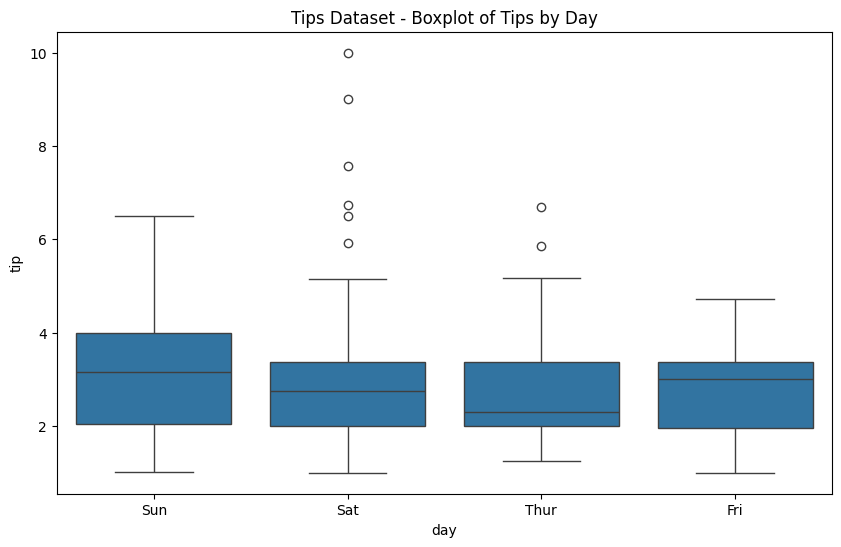

(min     1.0000
 25%     2.0000
 50%     2.9000
 75%     3.5625
 max    10.0000
 Name: tip, dtype: float64,
        total_bill  tip  size
 count         0.0  0.0   0.0
 mean          NaN  NaN   NaN
 std           NaN  NaN   NaN
 min           NaN  NaN   NaN
 25%           NaN  NaN   NaN
 50%           NaN  NaN   NaN
 75%           NaN  NaN   NaN
 max           NaN  NaN   NaN,
        total_bill         tip        size
 count  244.000000  244.000000  244.000000
 mean    19.785943    2.998279    2.569672
 std      8.902412    1.383638    0.951100
 min      3.070000    1.000000    1.000000
 25%     13.347500    2.000000    2.000000
 50%     17.795000    2.900000    2.000000
 75%     24.127500    3.562500    3.000000
 max     50.810000   10.000000    6.000000)

In [82]:
# Tips Dataset

def tips_summary(data):
    # Five-number summary for tips and day summaries
    tip_summary = data['tip'].describe(percentiles=[.25, .5, .75]).loc[['min', '25%', '50%', '75%', 'max']]
    weekend_summary = data[data['day'].isin(['Saturday', 'Sunday'])].describe(percentiles=[.25, .5, .75])
    weekday_summary = data[~data['day'].isin(['Saturday', 'Sunday'])].describe(percentiles=[.25, .5, .75])
    
    # Box plot for tips by day
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='day', y='tip', data=data)
    plt.title('Tips Dataset - Boxplot of Tips by Day')
    plt.show()
    
    return tip_summary, weekend_summary, weekday_summary
tips= pd.read_csv('C:/Users/marmi/OneDrive/Documents/tips.csv')
tips_summary(tips)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

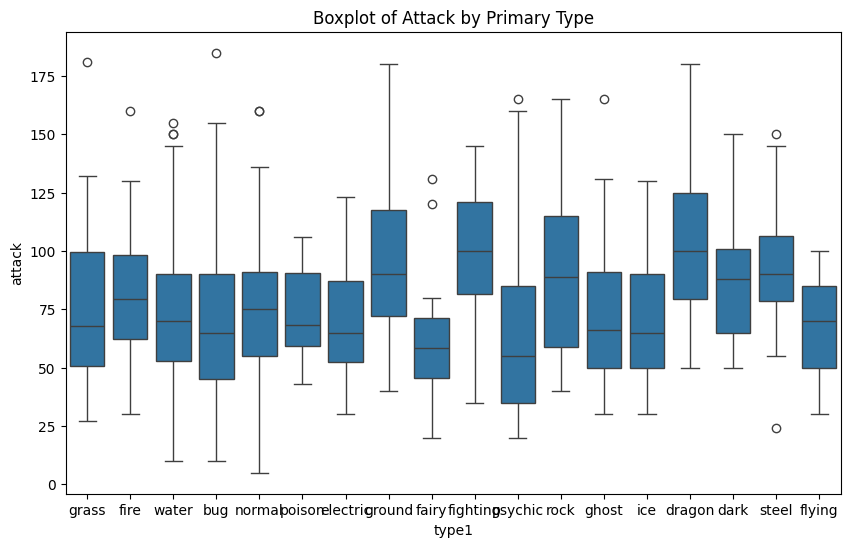

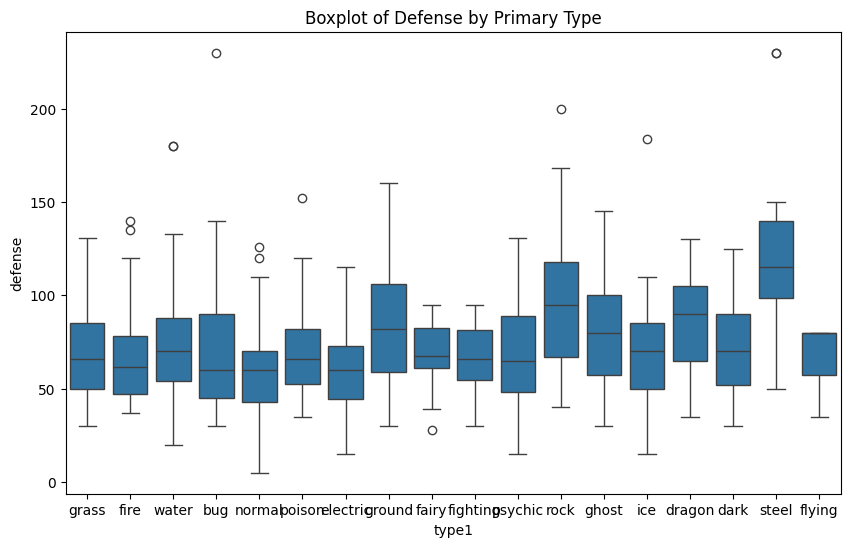

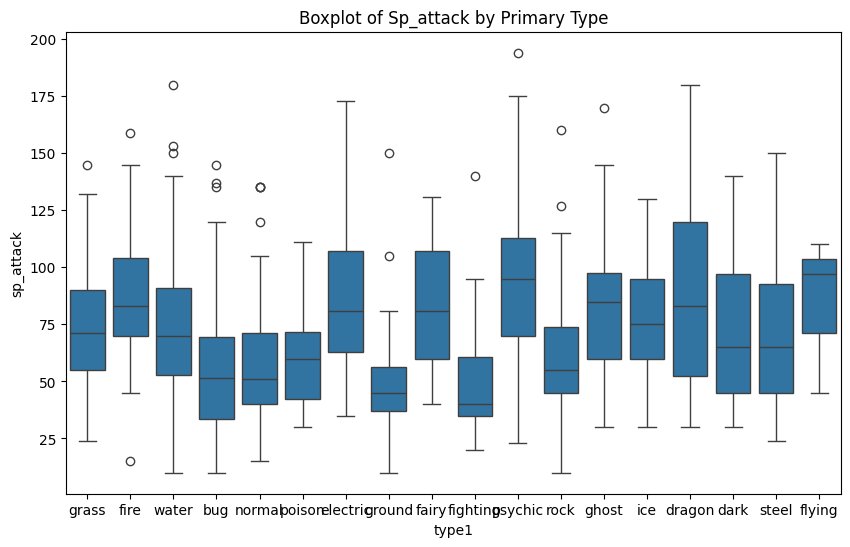

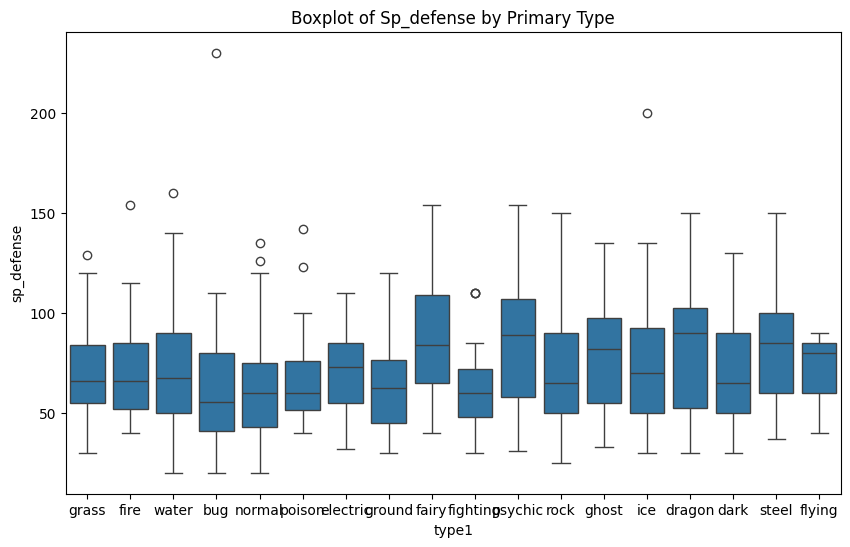

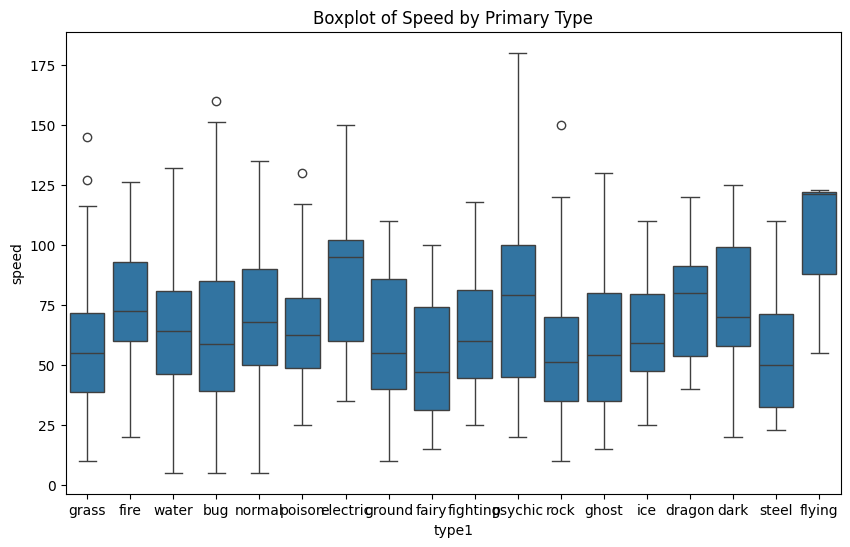

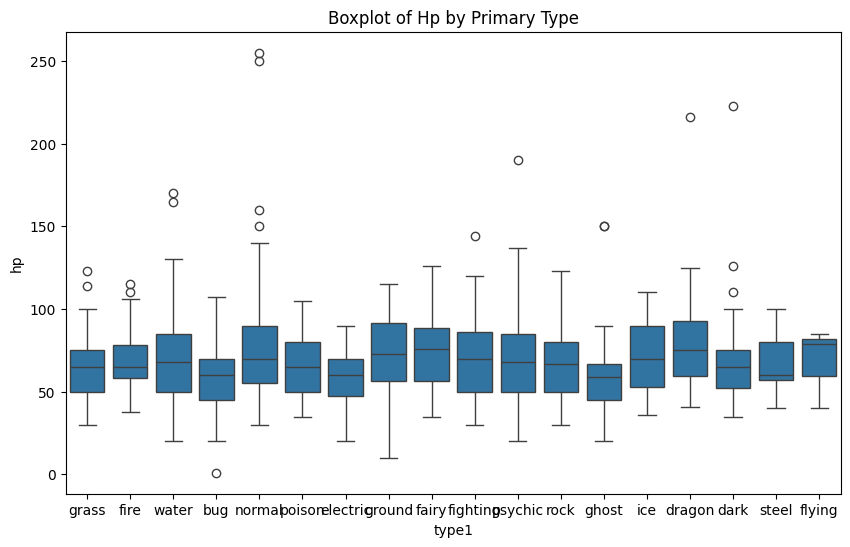

Summary of Stats:
      attack  defense  sp_attack  sp_defense  speed     hp
min     5.0      5.0       10.0        20.0    5.0    1.0
25%    55.0     50.0       45.0        50.0   45.0   50.0
50%    75.0     70.0       65.0        66.0   65.0   65.0
75%   100.0     90.0       91.0        90.0   85.0   80.0
max   185.0    230.0      194.0       230.0  180.0  255.0


In [83]:
# Pokemon Dataset

poke= pd.read_csv('C:/Users/marmi/OneDrive/Documents/Pokemon.csv')
poke.info()
def pokemon_summary(data):
    # Summary for individual stats
    stats_columns = ['attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'hp']
    stats_summary = data[stats_columns].describe(percentiles=[.25, .5, .75]).loc[['min', '25%', '50%', '75%', 'max']]
    
    # Box plot for each stat by Pokémon type
    for stat in stats_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='type1', y=stat, data=data)
        plt.title(f'Boxplot of {stat.capitalize()} by Primary Type')
        plt.show()

    print("Summary of Stats:\n", stats_summary)

pokemon_summary(poke)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


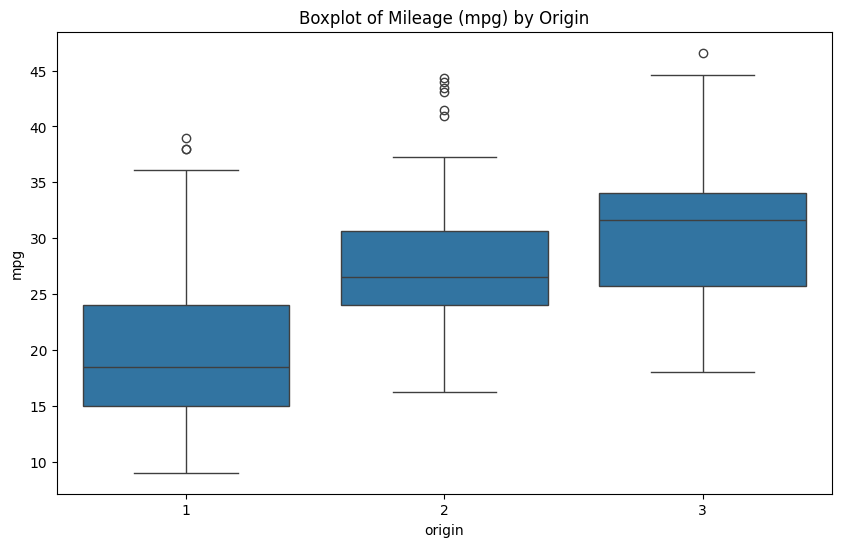

Mileage Summary:
 min     9.0
25%    17.5
50%    23.0
75%    29.0
max    46.6
Name: mpg, dtype: float64
Mileage by Origin:
         count       mean       std   min   25%   50%    75%   max
origin                                                           
1       249.0  20.083534  6.402892   9.0  15.0  18.5  24.00  39.0
2        70.0  27.891429  6.723930  16.2  24.0  26.5  30.65  44.3
3        79.0  30.450633  6.090048  18.0  25.7  31.6  34.05  46.6


In [84]:
# Car Mileage DataSet

cars= pd.read_csv('C:/Users/marmi/OneDrive/Documents/AutoMeg.csv')
cars.info()
def car_mileage_summary(data):
    # Five-number summary for the mpg (mileage) column
    summary = data['mpg'].describe(percentiles=[.25, .5, .75]).loc[['min', '25%', '50%', '75%', 'max']]
    
    # Grouped summary by origin
    origin_summary = data.groupby('origin')['mpg'].describe(percentiles=[.25, .5, .75])
    
    # Box plot for mpg by origin
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='origin', y='mpg', data=data)
    plt.title('Boxplot of Mileage (mpg) by Origin')
    plt.show()

    print("Mileage Summary:\n", summary)
    print("Mileage by Origin:\n", origin_summary)

car_mileage_summary(cars)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


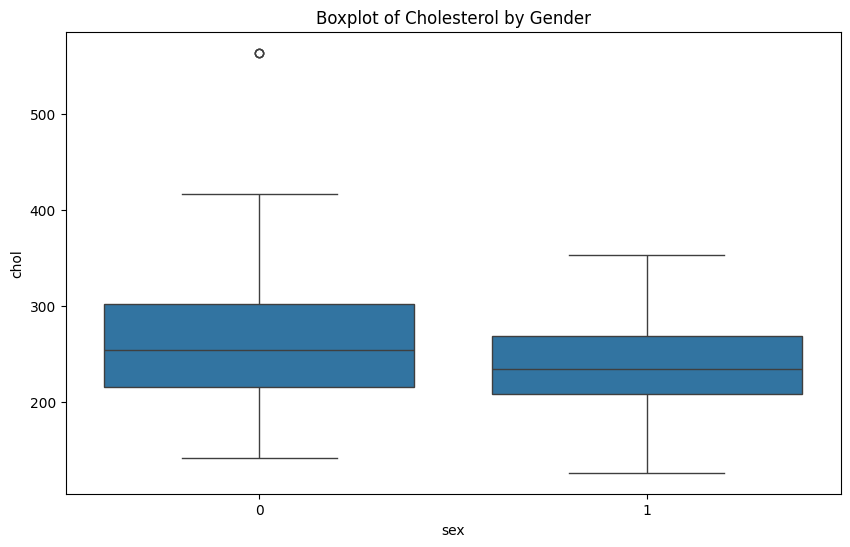

Summary:
       age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
min  29.0  0.0  0.0      94.0  126.0  0.0      0.0     71.0    0.0      0.0   
25%  48.0  0.0  0.0     120.0  211.0  0.0      0.0    132.0    0.0      0.0   
50%  56.0  1.0  1.0     130.0  240.0  0.0      1.0    152.0    0.0      0.8   
75%  61.0  1.0  2.0     140.0  275.0  0.0      1.0    166.0    1.0      1.8   
max  77.0  1.0  3.0     200.0  564.0  1.0      2.0    202.0    1.0      6.2   

     slope   ca  thal  target  
min    0.0  0.0   0.0     0.0  
25%    1.0  0.0   2.0     0.0  
50%    1.0  0.0   2.0     1.0  
75%    2.0  1.0   3.0     1.0  
max    2.0  4.0   3.0     1.0  
Gender-wise Summary:
        age                                                        cp  \
     count       mean       std   min   25%   50%   75%   max  count   
sex                                                                    
0    312.0  55.849359  9.368127  34.0  50.0  57.0  63.0  76.0  312.0   
1    713.0  5

In [86]:
# Heart Disease Dataset
def heart_disease_summary(data):
    # Five-number summary for all numerical features
    summary = data.describe(percentiles=[.25, .5, .75]).loc[['min', '25%', '50%', '75%', 'max']]
    
    # Grouped summary by 'sex' if that represents gender
    gender_summary = data.groupby('sex').describe(percentiles=[.25, .5, .75])
    
    # Box plot for 'chol' (cholesterol) by gender
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='sex', y='chol', data=data)
    plt.title('Boxplot of Cholesterol by Gender')
    plt.show()

    print("Summary:\n", summary)
    print("Gender-wise Summary:\n", gender_summary)


heart= pd.read_csv('C:/Users/marmi/OneDrive/Documents/Heart.csv')
heart.info()
heart_disease_summary(heart)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


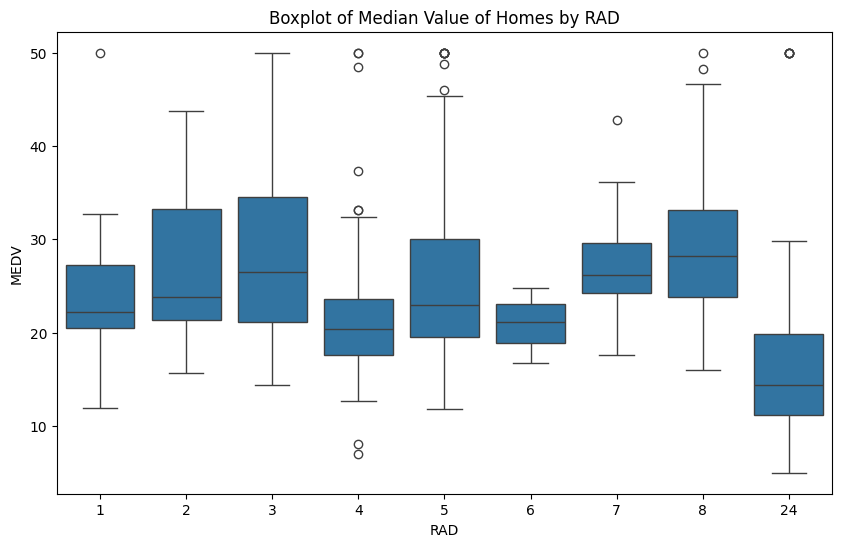

Summary:
           CRIM     ZN  INDUS  CHAS    NOX      RM      AGE        DIS   RAD  \
min   0.006320    0.0   0.46   0.0  0.385  3.5610    2.900   1.129600   1.0   
25%   0.081900    0.0   5.19   0.0  0.449  5.8855   45.175   2.100175   4.0   
50%   0.253715    0.0   9.69   0.0  0.538  6.2085   76.800   3.207450   5.0   
75%   3.560263   12.5  18.10   0.0  0.624  6.6235   93.975   5.188425  24.0   
max  88.976200  100.0  27.74   1.0  0.871  8.7800  100.000  12.126500  24.0   

       TAX  PTRATIO         B   LSTAT    MEDV  
min  187.0    12.60    0.3200   1.730   5.000  
25%  279.0    17.40  375.3775   7.125  17.025  
50%  330.0    19.05  391.4400  11.430  21.200  
75%  666.0    20.20  396.2250  16.955  25.000  
max  711.0    22.00  396.9000  37.970  50.000  
RAD-wise Summary:
       CRIM                                                                \
     count       mean        std      min       25%       50%        75%   
RAD                                                     

In [87]:
# Boston HOusing DataSet

def boston_housing_summary(data):
    # Five-number summary for all numerical features
    summary = data.describe(percentiles=[.25, .5, .75]).loc[['min', '25%', '50%', '75%', 'max']]
    
    # Grouped summary by 'RAD'
    rad_summary = data.groupby('RAD').describe(percentiles=[.25, .5, .75])
    
    # Box plot for 'MEDV' (median value of homes) by RAD
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='RAD', y='MEDV', data=data)
    plt.title('Boxplot of Median Value of Homes by RAD')
    plt.show()

    print("Summary:\n", summary)
    print("RAD-wise Summary:\n", rad_summary)


hous= pd.read_csv('C:/Users/marmi/OneDrive/Documents/HousingData.csv')
hous.info()
boston_housing_summary(hous)